In [2]:
import pandas as pd
import subprocess
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
export_folder = "/home/hv270/rds/rds-who1000-cbrc/user/wja24/shared/hippolyte_only/interval_processing"

# Phenotypes GWAS

In [51]:
adp = pd.read_csv("%s/bolt_res_ADP_FIB" % export_folder, sep="\t")
adp = adp.dropna(axis=0,how="any")

In [52]:
adp["MBP"] = (adp["BP"] / 1e6).astype(int)

In [5]:
adp.head()

,SNP,CHR,BP,GENPOS,ALLELE1,ALLELE0,A1FREQ,F_MISS,BETA,SE,P_BOLT_LMM_INF,P_BOLT_LMM,MBP
0,rs568149713,1,15777,0,A,G,0.991900,0.037358,0.041778,0.034911,0.23,0.26,0
1,rs199745162,1,16949,0,A,C,0.986426,0.048444,-0.013448,0.027387,0.62,0.66,0
2,rs533090414,1,18849,0,C,G,0.022947,0.050817,-0.004801,0.021111,0.82,0.83,0
3,rs2691277,1,52238,0,T,G,0.012584,0.050376,-0.021466,0.028152,0.45,0.45,0
4,rs552304420,1,54712,0,T,C,0.993450,0.021764,0.013500,0.038713,0.73,0.81,0


In [6]:
def best_of(df, threshold = 5e-8):
    df = df.dropna(axis=0,how="any")
    df["MBP"] = (df["BP"] / 1e6).astype(int)
    return df.loc[df.P_BOLT_LMM < threshold].sort_values("P_BOLT_LMM").groupby(["CHR", "MBP"])[["SNP","P_BOLT_LMM","A1FREQ"]].first()

In [7]:
best_of(adp)

SNP    P_BOLT_LMM    A1FREQ
CHR MBP                                    
1   1    rs12068889  2.600000e-08  0.983450
    113  rs10776757  1.900000e-09  0.474631
    156  rs12566888  7.100000e-09  0.910696
    171   rs6425521  2.300000e-16  0.194318
    198  rs17625587  1.600000e-24  0.740051
    199   rs1434282  1.400000e-25  0.265334
    207   rs2808466  5.500000e-27  0.880381
2   31    rs3835890  1.300000e-09  0.273832
4   6    rs12640189  2.800000e-09  0.824703
5   122    rs246271  1.300000e-26  0.331074
    150  rs56859579  4.700000e-10  0.390953
6   25   rs57318254  7.900000e-18  0.540235
    137  rs12191772  2.800000e-11  0.811899
    158    rs688181  3.100000e-10  0.281006
7   80    rs6961069  3.400000e-09  0.595502
    106    rs342293  1.300000e-24  0.543426
8   106   rs6993770  2.600000e-27  0.716314
    144  rs55836855  4.700000e-10  0.579557
    145  rs11329885  3.200000e-12  0.641516
9   113  rs61751937  6.600000e-10  0.971379
10  64   rs11278263  5.900000e-15  0.527064
    65   rs10822155  2.100000e-16  0.582090
11  0    rs55966801  4.400000e-08  0.784163
12  54   rs10876550  2.500000e-09  0.443368
15  65   rs59001897  8.800000e-24  0.832433
16  28     rs151234  3.300000e-13  0.871505
    81   rs74029252  5.400000e-16  0.860567
17  4      rs238232  1.200000e-10  0.193962
18  9    rs11315757  1.800000e-10  0.257410
19  16    rs8104011  6.000000e-10  0.983126
    38   rs35496032  8.100000e-12  0.986586
    55    rs1654425  1.200000e-20  0.165821
20  1     rs6136477  3.600000e-09  0.782401
    57     rs415064  1.400000e-10  0.952203
22  43    rs2010366  1.000000e-10  0.422227

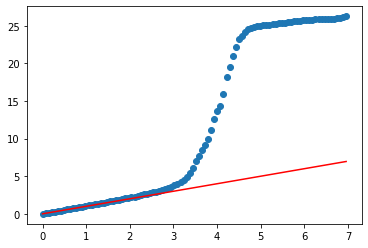

In [8]:
q_bins = np.logspace(-np.log10(adp.shape[0]),0,100)
q_values = np.log10(adp["P_BOLT_LMM"].quantile(q_bins).values)
plt.scatter(-np.log10(q_bins), -q_values)
plt.plot([0,-np.log10(np.min(q_bins))], [0,-np.log10(np.min(q_bins))], c="red")

In [9]:
adp.loc[adp["SNP"] == "rs2363910"]

,SNP,CHR,BP,GENPOS,ALLELE1,ALLELE0,A1FREQ,F_MISS,BETA,SE,P_BOLT_LMM_INF,P_BOLT_LMM,MBP
4510599,rs2363910,7,155760863,0,T,G,0.08466,0.033562,-0.000439,0.011221,0.97,0.82,155


In [10]:
adp_bgen = pd.read_csv("%s/bolt_res_bgen_ADP_FIB" % export_folder, sep="\t")

In [11]:
adp_bgen = adp_bgen.dropna(axis=0, how="any")
adp_bgen["CHR"] = adp_bgen["CHR"].astype(int)
adp_bgen["BP"] = adp_bgen["BP"].astype(int)
adp_bgen["MBP"] = (adp_bgen["BP"] / 1e6).astype(int)

In [12]:
adp_bgen.head()

,SNP,CHR,BP,GENPOS,ALLELE1,ALLELE0,A1FREQ,INFO,BETA,SE,P_BOLT_LMM_INF,P_BOLT_LMM,MBP
0,rs367896724,1,10177,0,A,AC,0.623320,0.735090,0.008579,0.007413,0.25,0.21,0
1,rs145072688,1,10352,0,T,TA,0.621687,0.722254,-0.000110,0.007458,0.99,0.91,0
2,rs537182016,1,10539,0,C,A,0.998656,0.699217,0.158460,0.098253,0.11,0.11,0
3,rs376342519,1,10616,0,CCGCCGTTGCAAAGGCGCGCCG,C,0.007513,0.722328,0.019692,0.041966,0.64,0.66,0
4,rs575272151,1,11008,0,C,G,0.915230,0.737639,0.014050,0.012845,0.27,0.22,0


In [13]:
best_of(adp_bgen, threshold=1e-7)

SNP    P_BOLT_LMM    A1FREQ
CHR MBP                                     
1   1     rs12068889  2.400000e-08  0.982511
    30   rs541051707  8.700000e-08  0.998128
    113   rs12046208  4.700000e-09  0.527989
    156   rs12566888  5.800000e-09  0.909890
    171   rs10914127  2.100000e-16  0.194869
    198   rs17625587  6.400000e-25  0.735345
    199    rs1434282  6.900000e-25  0.272619
    207    rs2808466  1.400000e-26  0.876046
2   16   rs115636468  4.200000e-08  0.953277
    31      rs632964  1.400000e-09  0.282157
4   6     rs11734132  3.900000e-09  0.825019
5   122   rs10623024  1.300000e-26  0.331173
    150    rs4958267  1.800000e-09  0.631172
6   25    rs57318254  8.700000e-18  0.538521

In [14]:
adp_bgen.loc[adp_bgen["SNP"] == "rs12566888"]

,SNP,CHR,BP,GENPOS,ALLELE1,ALLELE0,A1FREQ,INFO,BETA,SE,P_BOLT_LMM_INF,P_BOLT_LMM,MBP
879506,rs12566888,1,156869047,0,G,T,0.90989,0.990063,0.060814,0.010805,1.800000e-08,5.800000e-09,156


In [15]:
crp = pd.read_csv("%s/bolt_res_CRP_FIB" % export_folder, sep="\t")


In [16]:
crp["MBP"] = (crp["BP"] / 1e6).astype(int)

In [17]:
best_of(crp)

/home/hv270/platelets/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


SNP    P_BOLT_LMM    A1FREQ
CHR MBP                                     
1   113   rs10776757  1.900000e-09  0.474631
    156   rs72698679  1.800000e-08  0.897258
    171    rs6425521  1.700000e-22  0.194318
    172    rs6693520  4.000000e-08  0.512210
    198   rs17625587  5.900000e-23  0.740051
    199    rs1434282  1.900000e-24  0.265334
    207    rs2808466  1.700000e-26  0.880381
2   31     rs3835890  7.000000e-13  0.273832
4   6     rs12640189  1.600000e-09  0.824703
5   122     rs246271  9.200000e-32  0.331074
    150    rs4958267  2.000000e-08  0.634806
6   25    rs57318254  3.900000e-18  0.540235
    110    rs9372253  1.500000e-08  0.558522
    137   rs12191772  1.700000e-10  0.811899
    158     rs688181  4.500000e-12  0.281006
7   80     rs1194196  1.200000e-08  0.525824
    106     rs342293  5.400000e-26  0.543426
    116   rs13239000  4.400000e-08  0.751989
8   106    rs6993770  1.300000e-27  0.716314
    144    rs7833924  2.400000e-10  0.572953
    145   rs11329885  2.300000e-12  0.641516
9   113  rs117149770  2.800000e-08  0.973409
10  64    rs35562567  1.700000e-12  0.519375
    65    rs10822155  1.300000e-13  0.582090
12  54    rs10876550  9.100000e-10  0.443368
15  65    rs59001897  3.900000e-22  0.832433
16  28      rs151234  3.400000e-14  0.871505
    81    rs74029252  1.400000e-11  0.860567
17  4       rs238243  2.000000e-09  0.180134
18  9     rs11315757  2.400000e-11  0.257410
19  16     rs8104011  1.600000e-10  0.983126
    38    rs35496032  2.200000e-09  0.986586
    55     rs1654425  8.900000e-15  0.165821
20  1     rs10485824  7.600000e-10  0.789589
    57      rs415064  5.400000e-49  0.952203
22  43     rs2010366  5.500000e-14  0.422227

In [20]:
par = pd.read_csv("%s/bolt_res_PAR1_FIB" % export_folder, sep="\t")
par["MBP"] = (par["BP"] / 1e6).astype(int)

In [23]:
best_of(par, threshold=5e-7)

/home/hv270/platelets/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


SNP    P_BOLT_LMM    A1FREQ
CHR MBP                                     
1   1     rs12068889  4.500000e-08  0.983450
    113   rs10776757  8.600000e-10  0.474631
    156   rs72698679  1.100000e-08  0.897258
    171    rs6425521  2.900000e-20  0.194318
    172    rs6693520  3.300000e-07  0.512210
    198   rs17625587  5.700000e-24  0.740051
    199    rs1434282  3.300000e-25  0.265334
    207    rs2808466  6.900000e-26  0.880381
2   16   rs115636468  4.300000e-08  0.955753
    31      rs632964  1.300000e-11  0.281069
4   6     rs12640189  1.400000e-09  0.824703
5   122     rs246271  1.900000e-28  0.331074
    150    rs4958267  1.800000e-09  0.634806
6   25    rs57318254  1.600000e-18  0.540235
    110    rs9372253  2.200000e-07  0.558522
    137   rs12191772  7.300000e-11  0.811899
    158     rs688181  2.700000e-11  0.281006
7   80     rs1194196  1.000000e-08  0.525824
    106     rs342293  1.000000e-26  0.543426
    116   rs13239000  3.000000e-08  0.751989
8   106    rs6993770  2.300000e-27  0.716314
    144   rs55836855  1.300000e-10  0.579557
    145   rs11329885  8.000000e-13  0.641516
9   113   rs61751937  4.200000e-09  0.971379
10  64    rs35562567  3.800000e-14  0.519375
    65    rs10822155  1.400000e-15  0.582090
    104   rs61869602  1.100000e-07  0.594219
12  54    rs10876550  5.100000e-10  0.443368
14  69   rs117823369  4.200000e-07  0.968644
15  65    rs59001897  6.500000e-24  0.832433
16  28      rs151234  4.000000e-13  0.871505
    81    rs74029252  5.300000e-14  0.860567
17  4       rs238232  3.500000e-10  0.193962
18  9     rs11315757  9.200000e-11  0.257410
19  16     rs8104011  1.300000e-10  0.983126
    38    rs35496032  9.800000e-11  0.986586
    55     rs1654425  1.100000e-17  0.165821
20  1     rs10485824  1.200000e-09  0.789589
    57      rs415064  1.800000e-25  0.952203
22  43     rs2010366  7.100000e-13  0.422227

# Association to features

In [3]:
features = pd.read_csv("%s/features.csv" % export_folder, sep="\t")
f_cols = features.columns[2:-4]

In [25]:
features.head()

,FID,IID,high_10_0,high_10_1,high_20_0,high_20_1,high_50_0,high_50_1,low_10_0,low_10_1,...,mode_1,S_0,S_1,iqr_0,iqr_1,corr,MPV_wb,PCT_wb,PDW_wb,PLT_wb
0,110018327792,110018327792,0.512389,-0.532091,0.530238,-0.471025,0.441687,-0.314875,0.250156,-0.720891,...,0.444352,0.967313,1.504484,0.281344,0.069848,0.418477,-0.750000,-1.000000,-0.678571,-0.458333
1,110018483652,110018483652,1.166945,-0.033822,1.062551,-0.045256,0.987633,0.036630,1.661541,0.338230,...,0.567618,0.118756,0.425957,0.015476,-0.922220,0.247815,1.000000,-0.285714,1.142857,-0.597222
2,110001259381,110001259381,0.616211,-0.347955,0.623018,-0.297589,0.512161,-0.429401,1.075472,-0.147520,...,-0.420493,0.829441,0.202695,-0.432534,-0.457062,-0.358357,0.833333,-0.714286,0.857143,-0.861111
3,110004412832,110004412832,0.594799,0.406168,0.596421,0.444563,0.536050,0.477392,0.294502,0.599917,...,0.485224,1.028649,0.231348,0.569193,-0.372125,-0.254485,0.750000,-0.571429,0.785714,-0.736111
4,110003866786,110003866786,-0.188392,1.030546,-0.096827,1.069037,0.000878,1.084369,-0.274666,0.608039,...,-0.370675,0.061850,-1.782047,-0.075203,0.647698,0.218441,-0.416667,-0.285714,-0.357143,-0.166667


In [9]:
betas = pd.DataFrame(index=adp.index)
SEs = pd.DataFrame(index=adp.index)
p_vals = pd.DataFrame(index=adp.index)

for c in f_cols:
    df = pd.read_csv("%s/bolt_res_%s" % (export_folder, c), sep="\t")
    betas[c] = df["BETA"]
    SEs[c] = df["SE"]
    p_col = "P_BOLT_LMM" if "P_BOLT_LMM" in df.columns else "P_BOLT_LMM_INF"
    p_vals[c] = df[p_col]
c = (SEs.isnull().sum(axis=1) + betas.isnull().sum(axis=1) == 0)
SEs = SEs.loc[c]
betas = betas.loc[c]
p_vals = p_vals.loc[c]

In [10]:
df.sample(10)

,SNP,CHR,BP,GENPOS,ALLELE1,ALLELE0,A1FREQ,F_MISS,BETA,SE,P_BOLT_LMM_INF
3287649,rs200059501,5,156237779,0,C,CA,0.987734,0.002348,0.006442,0.020881,0.760
1088589,rs143789346,2,123310525,0,C,G,0.334343,0.000827,-0.000486,0.004892,0.920
1775952,rs112465852,3,96261588,0,A,T,0.933621,0.010452,0.012230,0.009290,0.190
6771546,rs9553591,13,19712628,0,T,C,0.205687,0.018323,0.012129,0.005768,0.035
1522556,rs6789949,3,13764246,0,C,T,0.564758,0.019646,0.002533,0.004691,0.590
6189759,rs77978117,11,94114419,0,T,C,0.979239,0.001125,0.000554,0.016133,0.970
8746395,rs7264486,20,37499394,0,A,G,0.861387,0.012039,-0.005165,0.006718,0.440
4253240,rs35971928,7,71281011,0,A,AT,0.906108,0.024773,0.010011,0.008034,0.210
8375114,rs79626658,18,64943025,0,A,G,0.963977,0.007938,0.018753,0.012469,0.130
5175966,rs34669154,9,37280606,0,CA,C,0.443535,0.052257,0.002088,0.004766,0.660


In [17]:
def random_test(df, threshold = 1e-3, n_splits=1000):
    
    df["Z"] = (df["BETA"] / df["SE"]).abs()
    cond = df.P_BOLT_LMM < threshold
    snps_of_interest = df.loc[cond].SNP.tolist()
    pca = PCA(n_components = 10).fit(features[f_cols].values)
    
    Z = np.zeros((len(snps_of_interest),n_splits))
    for i in range(n_splits):
        indep_lambda = np.random.normal(size=(pca.n_components_,1))
        indep_lambda = indep_lambda * np.sqrt(pca.explained_variance_ratio_)
        corr_lambda = pca.inverse_transform(indep_lambda.T)
        beta = betas.loc[cond].values @ corr_lambda.T
        SE = np.sqrt((SEs.loc[cond].values ** 2) @ (corr_lambda ** 2).T)
        Z[:,i] = (beta / SE)[:,0]    
    
    scale = df.loc[cond,"Z"].quantile(0.1) / np.quantile(np.median(np.abs(Z),axis=1),0.1)
    #print(df.loc[cond,"Z"].quantile(0.1), 
    #      np.median(np.abs(Z),axis=1),
    #      np.quantile(np.median(np.abs(Z),axis=1),0.1), 
    #      scale)
    plt.hist(np.reshape(df.loc[cond,"Z"].abs(),(-1,)),bins=100,density=True,alpha=0.6,label="Phenotype")
    plt.hist(scale*np.reshape(np.median(np.abs(Z),axis=1),(-1,)),bins=100,density=True,alpha=0.6,label="Random phenotyopes")
    plt.yscale("log")
    
    sub_df = df.loc[cond]
    return Z, best_of(sub_df.loc[sub_df.Z > scale*np.quantile(np.abs(Z),0.99,axis=1)],threshold=threshold)

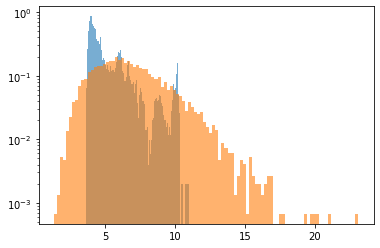

In [18]:
Z, b = random_test(adp,threshold=1e-3,n_splits=300)
b

,,SNP,P_BOLT_LMM,A1FREQ
CHR,MBP,,,
1,198,rs12023247,7.700000e-11,0.235642
5,122,rs42536,3.500000e-25,0.330233
6,25,rs214735,4.800000e-14,0.591636
7,106,rs342258,3.200000e-20,0.558919
10,65,rs7909960,3.500000e-12,0.525452
15,65,rs2630502,2.700000e-18,0.835306
16,81,rs13335344,1.300000e-14,0.856908


,,SNP,P_BOLT_LMM,A1FREQ
CHR,MBP,,,
1,198,rs12023247,8.300000e-10,0.235642
5,122,rs246282,2.500000e-32,0.330294
6,25,rs214735,1.000000e-14,0.591636
7,106,rs342294,1.000000e-21,0.545913
8,106,rs1901062,6.700000e-11,0.416055
10,65,rs7909960,2.500000e-09,0.525452
11,72,rs7929689,5.200000e-04,0.083339
15,65,rs2630502,1.100000e-17,0.835306
16,81,rs13335344,1.500000e-10,0.856908


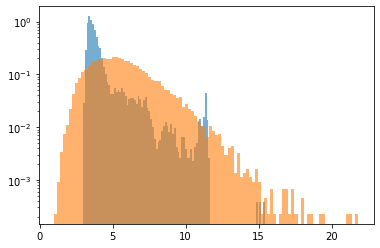

In [80]:
Z, b = random_test(crp,threshold=1e-3,n_splits=300)
b

,,SNP,P_BOLT_LMM,A1FREQ
CHR,MBP,,,
1,198,rs12023247,1.200000e-10,0.235642
5,122,rs404442,2.300000e-28,0.669154
6,25,rs214735,8.900000e-14,0.591636
7,106,rs61584365,7.800000e-19,0.562227
8,106,rs1901062,2.000000e-11,0.416055
10,65,rs7909960,2.600000e-10,0.525452
11,72,rs7929689,9.200000e-04,0.083339
15,65,rs2630502,2.200000e-18,0.835306
16,81,rs62045702,2.500000e-14,0.857186


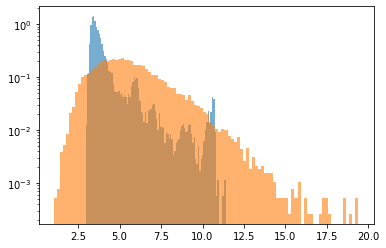

In [81]:
Z, b = random_test(par,threshold=1e-3,n_splits=300)
b

In [82]:
Z.shape

(21011, 300)

(array([62., 47., 53., 47., 34., 22., 12., 13.,  6.,  4.]),
 array([0.00937837, 0.25473223, 0.5000861 , 0.74543996, 0.99079382,
        1.23614769, 1.48150155, 1.72685542, 1.97220928, 2.21756315,
        2.46291701]),
 <a list of 10 Patch objects>)

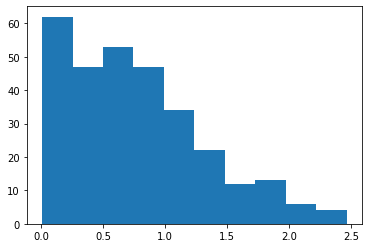

In [87]:
plt.hist(np.abs(Z)[2])

In [88]:
par.loc[par.P_BOLT_LMM < 1e-3].iloc[2]

SNP               rs543549289
CHR                         1
BP                    1435881
GENPOS                      0
ALLELE1                     G
ALLELE0                     A
A1FREQ               0.988579
F_MISS              0.0125021
BETA               -0.0385906
SE                  0.0113806
P_BOLT_LMM_INF         0.0007
P_BOLT_LMM            0.00082
MBP                         1
Z                     3.39091
Name: 2574, dtype: object

# Build random phenotypes

In [4]:
n_splits = 10000

In [26]:
# Random phenotypes
rp = pd.DataFrame(index=features.index, data=features[["FID","IID"]])

n_features = len(f_cols)
F = features[f_cols].values
pca = PCA(n_components=10).fit(features[f_cols])
for i in range(n_splits):
    indep_lambda = np.random.normal(size=(10,1))
    indep_lambda = indep_lambda.T * np.sqrt(pca.explained_variance_ratio_)
    corr_lambda = pca.inverse_transform(indep_lambda)
    f = F @ corr_lambda.T
    rp["rp_%d" % i] = f

In [27]:
rp.sample(2)

,FID,IID,rp_0,rp_1,rp_2,rp_3,rp_4,rp_5,rp_6,rp_7,...,rp_9990,rp_9991,rp_9992,rp_9993,rp_9994,rp_9995,rp_9996,rp_9997,rp_9998,rp_9999
27311,110016984456,110016984456,2.255375,0.035396,1.377958,-0.600536,-0.646635,0.973431,2.336119,-1.161307,...,-2.681597,1.551241,-1.243720,-1.089980,0.335395,1.216803,-1.773299,-2.557567,-0.585718,-0.347456
23806,110006630461,110006630461,-2.545203,-0.341297,0.455823,0.800894,-1.690402,-0.792004,-2.708115,0.093065,...,2.298460,-1.274983,0.438382,0.580248,-0.465462,-1.402749,0.008679,1.596984,1.166144,-0.353498


In [28]:
good_snps = adp.loc[adp.P_BOLT_LMM < 1e-4].SNP.unique().tolist()
print("Keeping %d good SNPS" % len(good_snps))
with open("%s/interesting_snps" % export_folder,"w") as f:
    for ID in good_snps:
        f.write("%s\n" % ID)

Keeping 7222 good SNPS


In [29]:
rp.to_csv("%s/random_phenos.csv" % export_folder, sep="\t", index=False)

## Run GWAS on these

In [30]:
tag = "random_pheno"
for k in range(1,23):
    command = "/home/hv270/Plink2/plink2 "

    command += "--bfile /home/hv270/rds/rds-who1000-cbrc/user/wja24/shared/hv270/interval_genotypes/chr_%d " % k
    command += "--glm hide-covar \
        --keep %s/king-cutoff.king.cutoff.in.id \
        --extract %s/interesting_snps \
        --pheno %s/random_phenos.csv \
        --covar %s/covariates.csv \
        --out %s/random_phenotypes_gwas/chr_%d \
        --threads %d" % (export_folder,
                            export_folder,
                            export_folder,
                            export_folder,
                            export_folder,
                            k,
                            n_splits)
    
    f_name = "/home/hv270/interval_slurm_calls/call_chr_%d.sh" % k
    f = open(f_name,"w+")
    f.write("#!/bin/sh\n")

    f.write("#SBATCH -J chr_%d\n" % k)
    f.write("#SBATCH -A ASTLE-SL2-CPU\n")
    f.write("#SBATCH -N 1\n")
    f.write("#SBATCH -n %d\n" % n_splits)
    #f.write("#SBATCH -c %d\n" % n_splits)
    f.write("#SBATCH --time=0:20:00\n")
    f.write("#SBATCH -p skylake\n")
    f.write("#SBATCH --output=/home/hv270/slurm_log/%s_%s.out\n" % (tag,k))
    f.write("export OMP_NUM_THREADS=%d\n" % n_splits)

    f.write(". /etc/profile.d/modules.sh\n")
    f.write("module purge\n")
    f.write("module load rhel7/default-peta4\n")
    f.write(command)
    f.close()

    print("Submitting %d" % k)
    p = subprocess.Popen("sbatch %s" % f_name,shell=True)
    p.wait()

Submitting 1
Submitting 2
Submitting 3
Submitting 4
Submitting 5
Submitting 6
Submitting 7
Submitting 8
Submitting 9
Submitting 10
Submitting 11
Submitting 12
Submitting 13
Submitting 14
Submitting 15
Submitting 16
Submitting 17
Submitting 18
Submitting 19
Submitting 20
Submitting 21
Submitting 22


## Read P-values of associations

In [5]:
all_p_values = []
for ch in range(1,23):
    for pheno in range(n_splits):
        if pheno == 0:
            p_values = pd.read_csv("%s/random_phenotypes_gwas/chr_%d.rp_%d.glm.linear" % (export_folder, ch, pheno), 
                               sep="\t")
            p_values.rename(columns={"P":"P_0"},inplace=True)
        else:
            p_values["P_%d" % pheno] = pd.read_csv("%s/random_phenotypes_gwas/chr_%d.rp_%d.glm.linear" % (export_folder, ch, pheno), 
                               sep="\t")["P"]
    all_p_values.append(p_values.copy())

In [6]:
all_ps = pd.concat(all_p_values,axis=0,sort=False)
p_cols = [c for c in all_ps.columns if c[:2] == "P_"]

In [48]:
all_ps["quantiles"] = all_ps[p_cols].quantile(0.01,axis=1)

In [49]:
all_ps.loc[all_ps["quantiles"] == 0.,"quantiles"] = 1e-100

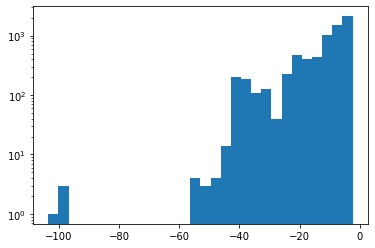

In [50]:
plt.hist(np.log10(all_ps["quantiles"]),bins=30)
plt.yscale("log")

## Run same GWAS on predicted phenotypes

In [36]:
phenos = pd.read_csv("%s/phenotypes.csv" % export_folder,sep="\t")

In [37]:
tag = "plink_pheno"
n_splits = 10
for k in range(1,23):
    command = "/home/hv270/Plink2/plink2 "

    command += "--bfile /home/hv270/rds/rds-who1000-cbrc/user/wja24/shared/hv270/interval_genotypes/chr_%d " % k
    command += "--glm hide-covar \
        --keep %s/king-cutoff.king.cutoff.in.id \
        --pheno %s/phenotypes.csv \
        --covar %s/covariates.csv \
        --out %s/phenotypes_plink_gwas/chr_%d \
        --threads %d" % (export_folder,
                            export_folder,
                            export_folder,
                            export_folder,
                            k,
                            n_splits)
    
    f_name = "/home/hv270/interval_slurm_calls/call_chr_%d.sh" % k
    f = open(f_name,"w+")
    f.write("#!/bin/sh\n")

    f.write("#SBATCH -J chr_%d\n" % k)
    f.write("#SBATCH -A ASTLE-SL2-CPU\n")
    f.write("#SBATCH -N 1\n")
    f.write("#SBATCH -n %d\n" % n_splits)
    #f.write("#SBATCH -c %d\n" % n_splits)
    f.write("#SBATCH --time=0:20:00\n")
    f.write("#SBATCH -p skylake\n")
    f.write("#SBATCH --output=/home/hv270/slurm_log/%s_%s.out\n" % (tag,k))
    f.write("export OMP_NUM_THREADS=%d\n" % n_splits)

    f.write(". /etc/profile.d/modules.sh\n")
    f.write("module purge\n")
    f.write("module load rhel7/default-peta4\n")
    f.write(command)
    f.close()

    print("Submitting %d" % k)
    p = subprocess.Popen("sbatch %s" % f_name,shell=True)
    p.wait()

Submitting 1
Submitting 2
Submitting 3
Submitting 4
Submitting 5
Submitting 6
Submitting 7
Submitting 8
Submitting 9
Submitting 10
Submitting 11
Submitting 12
Submitting 13
Submitting 14
Submitting 15
Submitting 16
Submitting 17
Submitting 18
Submitting 19
Submitting 20
Submitting 21
Submitting 22


In [24]:
adp_plink = pd.concat([pd.read_csv("%s/phenotypes_plink_gwas/chr_%d.%s.glm.linear" % (export_folder, ch, "ADP_FIB"), sep="\t") for ch in range(1,23)],axis=0)
crp_plink = pd.concat([pd.read_csv("%s/phenotypes_plink_gwas/chr_%d.%s.glm.linear" % (export_folder, ch, "CRP_FIB"), sep="\t") for ch in range(1,23)],axis=0)
par1_plink = pd.concat([pd.read_csv("%s/phenotypes_plink_gwas/chr_%d.%s.glm.linear" % (export_folder, ch, "PAR1_FIB"), sep="\t") for ch in range(1,23)],axis=0)

In [25]:
adp_plink.head()

,#CHROM,POS,ID,REF,ALT,A1,TEST,OBS_CT,BETA,SE,T_STAT,P
0,1,10177,rs367896724,AC,A,AC,ADD,15453,-0.011028,0.009193,-1.199630,0.230301
1,1,10352,rs145072688,TA,T,TA,ADD,15107,0.000682,0.009258,0.073627,0.941308
2,1,11008,rs575272151,G,C,G,ADD,24594,-0.026550,0.014406,-1.842930,0.065352
3,1,11012,rs544419019,G,C,G,ADD,24587,-0.012581,0.015028,-0.837160,0.402511
4,1,13110,rs540538026,A,G,A,ADD,25038,-0.005899,0.017933,-0.328949,0.742197


In [26]:
adp_plink["MBP"] = (adp_plink["POS"] / 1e6).astype(int)
crp_plink["MBP"] = (crp_plink["POS"] / 1e6).astype(int)
par1_plink["MBP"] = (par1_plink["POS"] / 1e6).astype(int)

In [43]:
adp_plink.loc[adp_plink.P < 1e-7].sort_values("P").groupby(["#CHROM","MBP"])[["ID","P"]].first()

ID             P
#CHROM MBP                          
1      1    rs12068889  1.078820e-08
       113  rs10776757  2.002790e-09
       156  rs12566888  7.699090e-09
       171   rs6425521  2.157560e-14
       198  rs17625587  7.846740e-24
       199   rs1434282  1.668190e-24
       207   rs2808466  5.827950e-26
2      31     rs632964  1.841010e-08
4      6    rs12640189  9.720120e-09
5      122    rs152039  3.952860e-25
       150   rs4958267  7.095590e-10
6      25   rs57318254  1.016220e-15
       137  rs12191772  7.426410e-11
       158    rs688181  2.371440e-09
7      80    rs6961069  3.299220e-08
       106    rs342293  4.050730e-23
       116  rs12532926  3.737100e-08
8      106   rs6993770  2.933860e-25
       144  rs55836855  2.820070e-09
       145  rs11329885  2.166670e-11
9      113  rs61751937  9.122670e-10
10     64   rs35562567  3.256690e-13
       65   rs10822155  4.172870e-14
12     54   rs10876550  7.895540e-09
15     65   rs59001897  6.217250e-22
16     28     rs151234  4.062850e-12
       81   rs74029252  1.192740e-15
17     4      rs238232  1.498300e-10
18     9    rs11315757  1.693150e-10
19     16    rs8104011  5.162060e-09
       38   rs35496032  5.152490e-12
       55    rs1654425  5.051470e-20
20     1    rs10485824  1.226830e-08
       57     rs415064  1.335280e-10
22     43    rs2010366  6.068090e-11

In [27]:
def filter_plink(df_plink):
    df_validate = pd.merge(df_plink.copy(),all_ps, left_on="ID",right_on="ID",how="inner")
    df_validate["quantile"] = sum([(df_validate[c] > df_validate.P)*1 for c in p_cols]) / len(p_cols)
    return df_validate
    #return df_validate.loc[(df_validate.quantile > .99) & (df_validate.P < 5e-8)].sort_values("P").groupby(["#CHROM_x","MBP"])[["ID","P","quantile"]].first()

In [55]:
adp_val = filter_plink(adp_plink)
adp_val = pd.merge(adp_val,adp[["SNP","P_BOLT_LMM"]],left_on="ID",right_on="SNP")

In [56]:
adp_val.head()

,#CHROM_x,POS_x,ID,REF_x,ALT_x,A1_x,TEST_x,OBS_CT_x,BETA_x,SE_x,...,P_9993,P_9994,P_9995,P_9996,P_9997,P_9998,P_9999,quantile,SNP,P_BOLT_LMM
0,1,1431998,rs904590,A,G,A,ADD,29172,0.120461,0.023837,...,0.007234,0.323561,0.010612,0.877408,0.001354,0.115003,0.000080,1.0,rs904590,1.300000e-06
1,1,1437605,rs145442616,A,T,A,ADD,29320,0.135980,0.024878,...,0.002807,0.438410,0.005688,0.953902,0.001265,0.125720,0.000033,1.0,rs145442616,1.300000e-07
2,1,1441065,rs35185404,A,G,A,ADD,29328,0.132389,0.024781,...,0.003201,0.497177,0.006307,0.992646,0.002013,0.115919,0.000050,1.0,rs35185404,2.700000e-07
3,1,1445274,rs191817663,C,T,C,ADD,29344,0.131934,0.024730,...,0.006650,0.379859,0.010033,0.972750,0.001429,0.074001,0.000088,1.0,rs191817663,2.700000e-07
4,1,1445849,rs116272777,T,C,T,ADD,29349,0.128092,0.024804,...,0.013909,0.346662,0.015356,0.877800,0.001163,0.045218,0.000220,1.0,rs116272777,6.200000e-07


In [64]:
adp_val.loc[adp_val["quantile"] < .5].loc[adp_val.P_BOLT_LMM < 2e-8].groupby(["#CHROM_x","MBP"])[["ID","P_BOLT_LMM","quantile"]].first()

,,ID,P_BOLT_LMM,quantile
#CHROM_x,MBP,,,
1,207,rs371127800,2.600000e-11,0.4973
6,137,rs12191772,2.800000e-11,0.4884
19,38,rs35496032,8.100000e-12,0.4133
20,57,rs34524896,2.400000e-09,0.2480


In [68]:
val_cond = (adp_val["quantile"] > .95) & (adp_val.P_BOLT_LMM < 2e-8)
adp_val.loc[val_cond].groupby(["#CHROM_x","MBP"])[["ID","P_BOLT_LMM","quantile"]].first()

ID    P_BOLT_LMM  quantile
#CHROM_x MBP                                     
1        113    rs4838959  4.300000e-09    0.9829
         156   rs72698679  1.200000e-08    0.9999
         198    rs1275163  2.900000e-09    0.9709
         199    rs6427756  4.400000e-21    1.0000
4        6     rs11731274  4.300000e-09    0.9609
5        122     rs417569  1.200000e-08    0.9717
6        25      rs301395  1.500000e-08    1.0000
7        80    rs10282644  1.600000e-08    0.9772
8        106    rs4734869  2.300000e-18    0.9597
         144    rs3923387  1.300000e-08    0.9623
         145    rs7002152  6.700000e-10    0.9532
9        113  rs137950543  1.800000e-08    0.9977
15       65    rs59001897  8.800000e-24    0.9582
16       28      rs231972  1.200000e-09    0.9855
18       9       rs428598  3.800000e-10    0.9876
19       16     rs8109288  5.400000e-09    0.9646
20       1     rs73076965  1.800000e-08    0.9981

In [72]:
validated_ADP_snps = adp_val.loc[val_cond].ID.tolist()
with open("%s/validated_snps/ADP.txt" % export_folder,"w") as f:
    for snp in validated_ADP_snps:
        f.write("%s\n" % snp)

In [55]:
filter_plink(crp_plink)

ID             P
#CHROM_x MBP                          
1        1    rs12068889  4.789930e-08
         199   rs1434282  1.465520e-23
5        122  rs10455038  1.497060e-09
6        25   rs57318254  6.297990e-16
8        145   rs1134029  2.706260e-09
16       28     rs231972  1.065270e-09
18       9    rs11315757  1.504970e-11
20       1    rs10485824  3.075070e-09

In [56]:
filter_plink(par4_plink)

ID             P
#CHROM_x MBP                           
1        1     rs12068889  1.891330e-08
         156   rs72698679  3.647430e-08
         198   rs10919615  4.048700e-22
         199    rs1434282  2.191280e-24
6        25      rs212936  1.681060e-13
7        80     rs9649532  3.822030e-08
8        106    rs7830388  6.415320e-17
         145    rs1134029  2.898910e-09
9        113  rs137950543  2.744560e-08
18       9     rs11315757  1.413300e-10
20       1     rs10485824  1.310040e-08

In [46]:
adp_validate = pd.merge(adp,all_ps, left_on="SNP",right_on="ID",how="inner")

In [52]:
adp.loc[adp.SNP == "rs72698679"]

,SNP,CHR,BP,GENPOS,ALLELE1,ALLELE0,A1FREQ,F_MISS,BETA,SE,P_BOLT_LMM_INF,P_BOLT_LMM,MBP,Z
371948,rs72698679,1,156867327,0,T,C,0.897372,0.017232,-0.036087,0.006866,1.500000e-07,1.500000e-07,156,5.255599


In [50]:
best_of(adp_validate.loc[(adp_validate.P_BOLT_LMM < adp_validate.quantiles)])

SNP    P_BOLT_LMM    A1FREQ
CHR MBP                                    
1   198  rs10919615  7.800000e-23  0.243452
    199   rs1434282  3.200000e-25  0.265413
5   122    rs417569  1.400000e-08  0.050314
6   25   rs57318254  2.000000e-16  0.539460
8   106  rs12680936  1.800000e-12  0.421320
    144   rs6990361  2.700000e-09  0.579646
    145  rs11136335  2.700000e-09  0.603555

In [89]:
adp_plink.head()

,#CHROM,POS,ID,REF,ALT,A1,TEST,OBS_CT,BETA,SE,T_STAT,P,MBP
0,1,10177,rs367896724,AC,A,AC,ADD,15442,-0.014561,0.009381,-1.552290,0.120614,0
1,1,10352,rs145072688,TA,T,TA,ADD,15095,0.001773,0.009465,0.187308,0.851421,0
2,1,11008,rs575272151,G,C,G,ADD,24572,-0.024161,0.014735,-1.639720,0.101077,0
3,1,11012,rs544419019,G,C,G,ADD,24566,-0.012395,0.015357,-0.807167,0.419578,0
4,1,13110,rs540538026,A,G,A,ADD,25014,-0.006106,0.018341,-0.332901,0.739212,0


In [90]:
-0.014561 / 0.009381

-1.5521799381729025

In [93]:
from scipy.stats import norm

In [95]:
2*norm.cdf(-1.5521799381729025)

0.12061917498184252

# Read summary files of all phenotypes

In [258]:
recap_df = {}

for pheno in ["ADP_FIB","CRP_FIB","PAR1_FIB","PAR4_FIB","TRAP_FIB","FIB"]:

    bolt = pd.read_csv("%s/bolt_res_%s" % (export_folder,pheno), sep="\t")
    bolt = bolt.dropna(axis=0,how="any")
    
    plink =  pd.concat([pd.read_csv("%s/phenotypes_plink_gwas/chr_%d.%s.glm.linear" % (export_folder, ch, pheno), sep="\t") for ch in range(1,23)],axis=0)
    
    val = pd.merge(plink,all_ps, left_on="ID",right_on="ID",how="inner")
    p_cols = [c for c in val.columns if c[:2] == "P_" and len(c) <= 8]
    val["test_quantile"] = pd.DataFrame(data=[val[p] < val["P"] for p in p_cols]).mean(axis=1)
    val["MBP"] = (val["POS_x"] / 1e6).astype(int)
    
    t = pd.merge(val, bolt, left_on="ID",right_on="SNP", how="inner")
    
    best = t.loc[t.P_BOLT_LMM < 1e-8].sort_values(by="P_BOLT_LMM",ascending=True)\
        .groupby(["CHR","MBP"])\
        .agg({"CHR":"first","BP":"first","ID":"first","test_quantile":"first","SNP":"count","P_BOLT_LMM":"first"})
    
    l = []
    
    for i, row in best.iterrows():
        bp = row["BP"]
        chrom = row["CHR"]

        genes = []
        k = 1
        while len(set(genes)) == 0 and k < 3**4:

            start = int(bp - k*1e5)
            stop = int(bp + k*1e5)
            hits = mv.query('chr%d:%d-%d AND _exists_:dbnsfp.genename' % (chrom, start, stop),
                            fetch_all=True,fields="dbnsfp.genename",
                            assembly="hg19")

            for a in hits:
                if type(a["dbnsfp"]["genename"]) is str:
                    genes.append(a["dbnsfp"]["genename"])
                else:
                    genes.append(a["dbnsfp"]["genename"][0])
            k*=3
        l.append(", ".join(list(set(genes))))
    best["genes"] = l
    recap_df[pheno] = best

Fetching 9736 variant(s) . . .
No more results to return.
Fetching 40343 variant(s) . . .
No more results to return.
Fetching 3053 variant(s) . . .
No more results to return.
Fetching 0 variant(s) . . .
No more results to return.
Fetching 8025 variant(s) . . .
No more results to return.
Fetching 0 variant(s) . . .
No more results to return.
Fetching 3724 variant(s) . . .
No more results to return.
Fetching 16703 variant(s) . . .
No more results to return.
Fetching 9834 variant(s) . . .
No more results to return.
Fetching 12043 variant(s) . . .
No more results to return.
Fetching 4464 variant(s) . . .
No more results to return.
Fetching 22566 variant(s) . . .
No more results to return.
Fetching 8840 variant(s) . . .
No more results to return.
Fetching 8495 variant(s) . . .
No more results to return.
Fetching 2514 variant(s) . . .
No more results to return.
Fetching 3881 variant(s) . . .
No more results to return.
Fetching 2493 variant(s) . . .
No more results to return.
Fetching 569 var

Fetching 9834 variant(s) . . .
No more results to return.
Fetching 12043 variant(s) . . .
No more results to return.
Fetching 4464 variant(s) . . .
No more results to return.
Fetching 22566 variant(s) . . .
No more results to return.
Fetching 8840 variant(s) . . .
No more results to return.
Fetching 8495 variant(s) . . .
No more results to return.
Fetching 2514 variant(s) . . .
No more results to return.
Fetching 3881 variant(s) . . .
No more results to return.
Fetching 2493 variant(s) . . .
No more results to return.
Fetching 569 variant(s) . . .
No more results to return.
Fetching 70135 variant(s) . . .
No more results to return.
Fetching 73731 variant(s) . . .
No more results to return.
Fetching 9867 variant(s) . . .
No more results to return.
Fetching 19454 variant(s) . . .
No more results to return.
Fetching 6078 variant(s) . . .
No more results to return.
Fetching 21335 variant(s) . . .
No more results to return.
Fetching 13220 variant(s) . . .
No more results to return.
Fetching

In [263]:
for p in recap_df:
    recap_df[p].to_csv("%s/recap_%s.csv" % (export_folder,p))

In [270]:
recap_df["PAR1_FIB"]

CHR         BP          ID  test_quantile  SNP    P_BOLT_LMM  \
CHR MBP                                                                 
1   113    1  113121673  rs10776757       0.089824   12  8.600000e-10   
    171    1  171942783   rs6425521       0.229000   20  2.900000e-20   
    198    1  198974904  rs10919615       0.079488   21  2.200000e-22   
    199    1  199010721   rs1434282       0.089824   59  3.300000e-25   
    207    1  207273751   rs2808466       0.023730   43  6.900000e-26   
2   31     2   31463866    rs632964       0.143689   11  1.300000e-11   
4   6      4    6893181  rs12640189       0.298879    4  1.400000e-09   
5   122    5  122212822    rs246271       0.110205  591  1.900000e-28   
    150    5  150752643   rs4958267       0.127093    4  1.800000e-09   
6   25     6   25557149  rs57318254       0.075557  293  1.600000e-18   
    137    6  137259725  rs12191772       0.092299    4  7.300000e-11   
    158    6  158092638    rs688181       0.360606    4  2.700000e-11   
7   106    7  106372219    rs342293       0.166254   88  1.000000e-26   
8   106    8  106581528   rs6993770       0.100451  113  2.300000e-27   
    144    8  144999417  rs55836855       0.116611   19  1.300000e-10   
    145    8  145030900  rs11329885       0.094919   86  8.000000e-13   
9   113    9  113312231  rs61751937       0.159849    2  4.200000e-09   
10  64    10   64916030  rs35562567       0.097685   24  3.800000e-14   
    65    10   65071215  rs10822155       0.009317  161  1.400000e-15   
12  54    12   54712308  rs10876550       0.042073    6  5.100000e-10   
15  65    15   65160392  rs59001897       0.098413   70  6.500000e-24   
16  28    16   28505660    rs151234       0.209055   20  4.000000e-13   
    81    16   81877165  rs74029252       0.153006   29  5.300000e-14   
17  4     17    4886037    rs238232       0.154608   29  3.500000e-10   
18  9     18    9617719  rs11315757       0.133644   31  9.200000e-11   
19  16    19   16196764   rs8104011       0.135828    8  1.300000e-10   
    38    19   38817628  rs35496032       0.154899    1  9.800000e-11   
    55    19   55538980   rs1654425       0.032610   96  1.100000e-17   
20  1     20    1518100  rs10485824       0.068715   16  1.200000e-09   
    57    20   57597971    rs415064       0.213568    4  1.800000e-25   
22  43    22   43381288   rs2010366       0.080070  402  7.100000e-13   

                                                     genes  
CHR MBP                                                     
1   113                         ST7L, MOV10, CAPZA1, WNT2B  
    171                                               DNM3  
    198                                              PTPRC  
    199                                              PTPRC  
    207               C4BPB, C1orf116, C4BPA, PFKFB2, YOD1  
2   31                                   EHD3, XDH, CAPN14  
4   6                                    TBC1D14, KIAA0232  
5   122                                        SNX24, SNX2  
    150                          SLC36A2, SLC36A1, SLC36A3  
6   25                                       CARMIL1, SCGN  
    137                              IL20RA, SLC35D3, PEX7  
    158                                            ZDHHC14  
7   106                                            CCDC71L  
8   106                                              ZFPM2  
    144   SPATC1, EPPK1, PUF60, NRBP2, PLEC, GRINA, PARP10  
    145          SPATC1, EPPK1, PLEC, GRINA, OPLAH, PARP10  
9   113                                              SVEP1  
10  64                                       JMJD1C, NRBF2  
    65                                              JMJD1C  
12  54   NFE2, ITGA5, HNRNPA1, COPZ1, ZNF385A, CBX5, GPR84  
15  65   SPG21, RBPMS2, PIF1, AC069368.1, ANKDD1A, PLEKHO2  
16  28   IL27, NPIPB7, EIF3CL, APOBR, AC138894.1, NUPR1...  
    81                                               PLCG2  
17  4    C17orf107, SLC25A11, MINK1, INCA1, CAMTA2, PFN...  
18  9        

In [20]:
p_cols = [c for c in val.columns if c[:2] == "P_" and len(c) <= 8]
#val["quantile"] = pd.DataFrame(data=[val[p] < val["P"] for p in p_cols]).mean(axis=1)

In [17]:
val.head()

,#CHROM_x,POS_x,ID,REF_x,ALT_x,A1_x,TEST_x,OBS_CT_x,BETA_x,SE_x,...,P_9991,P_9992,P_9993,P_9994,P_9995,P_9996,P_9997,P_9998,P_9999,quantile
0,1,1431998,rs904590,A,G,A,ADD,29172,0.120461,0.023837,...,0.592182,0.000186,0.007234,0.323561,0.010612,0.877408,0.001354,0.115003,0.000080,0.027515
1,1,1437605,rs145442616,A,T,A,ADD,29320,0.135980,0.024878,...,0.741789,0.000047,0.002807,0.438410,0.005688,0.953902,0.001265,0.125720,0.000033,0.049934
2,1,1441065,rs35185404,A,G,A,ADD,29328,0.132389,0.024781,...,0.840059,0.000059,0.003201,0.497177,0.006307,0.992646,0.002013,0.115919,0.000050,0.068278
3,1,1445274,rs191817663,C,T,C,ADD,29344,0.131934,0.024730,...,0.661962,0.000111,0.006650,0.379859,0.010033,0.972750,0.001429,0.074001,0.000088,0.165526
4,1,1445849,rs116272777,T,C,T,ADD,29349,0.128092,0.024804,...,0.553638,0.000213,0.013909,0.346662,0.015356,0.877800,0.001163,0.045218,0.000220,0.076285


In [247]:
best = t.loc[t.P_BOLT_LMM < 5e-8].sort_values(by="P_BOLT_LMM",ascending=True)\
        .groupby(["CHR","MBP"])\
        .agg({"CHR":"first","BP":"first","ID":"first","quantile":"first","SNP":"count","P_BOLT_LMM":"first"})

In [32]:
import myvariant
mv = myvariant.MyVariantInfo()

In [148]:
to_query = best.ID.tolist()
a = mv.querymany(to_query,scopes='dbsnp.rsid', build="hg38",fetchall=False)

querying 1-35...done.
Finished.
17 input query terms found dup hits:
	[('rs10776757', 2), ('rs6425521', 2), ('rs10919615', 2), ('rs632964', 3), ('rs12640189', 2), ('rs573
Pass "returnall=True" to return complete lists of duplicate or missing query terms.


In [141]:
best

ID  quantile  SNP    P_BOLT_LMM
CHR MBP                                         
1   1    rs12068889  0.192750    1  2.600000e-08
    113  rs10776757  0.086767   23  1.900000e-09
    156  rs12566888  0.126802    4  7.100000e-09
    171   rs6425521  0.199884   15  2.300000e-16
    198  rs10919615  0.079633   21  5.500000e-23
    199   rs1434282  0.087786   60  1.400000e-25
    207   rs2808466  0.032319   49  5.500000e-27
2   31     rs632964  0.166109    6  1.300000e-09
4   6    rs12640189  0.271655    4  2.800000e-09
5   122    rs152039  0.132916  590  1.300000e-26
    150  rs56859579  0.178483   90  4.700000e-10
6   25   rs57318254  0.116756  301  7.900000e-18
    137  rs12191772  0.086767   10  2.800000e-11
    158    rs688181  0.344300    4  3.100000e-10
7   80    rs6961069  0.018052   50  3.400000e-09
    106    rs342293  0.154316   88  1.300000e-24
8   106   rs6993770  0.102053  114  2.600000e-27
    144  rs55836855  0.083564   20  4.700000e-10
    145  rs11329885  0.086330   90  3.200000e-12
9   113  rs61751937  0.164362    3  6.600000e-10
10  64   rs11278263  0.220847   25  5.900000e-15
    65   rs10822155  0.048770  177  2.100000e-16
11  0    rs55966801  0.139613    1  4.400000e-08
12  54   rs10876550  0.042510    7  2.500000e-09
15  65   rs59001897  0.093318   89  8.800000e-24
16  28     rs151234  0.202213   24  3.300000e-13
    81   rs74029252  0.164798   51  5.400000e-16
17  4      rs238232  0.156063   40  1.200000e-10
18  9    rs11315757  0.122725   39  1.800000e-10
19  16    rs8104011  0.201922    8  6.000000e-10
    38   rs35496032  0.162760    1  8.100000e-12
    55    rs1654425  0.066240  105  1.200000e-20
20  1     rs6136477  0.085165   17  3.600000e-09
    57     rs415064  0.194351    3  1.400000e-10
22  43    rs2010366  0.074683  387  1.000000e-10

In [160]:
gene_names = {}
for i in range(len(a)):
    q = a[i]["query"]
    try:
        gene = a[i]["cadd"]["gene"]["genename"]
    except:
        try:
            gene = a[i]["dbsnp"]["gene"]["symbol"]
        except:
            try:
                gene = a[i]["wellderly"]["genename"]
            except:
                try:
                    gene = a[i]["snpeff"]["ann"]["genename"]
                except:
                    gene = a[i]["snpeff"]["ann"][0]["genename"]
    if q in gene_names:
        gene_names[q].append(gene)
    else:
        gene_names[q] = [gene]

In [161]:
gene_names

{'rs12068889': ['ATAD3A'],
 'rs10776757': ['ST7L', 'ST7L'],
 'rs12566888': ['PEAR1'],
 'rs6425521': ['DNM3', 'DNM3'],
 'rs10919615': ['RP11-16L9.3', 'LINC01222'],
 'rs1434282': ['LINC01221'],
 'rs2808466': ['C4BPB'],
 'rs632964': ['EHD3', 'EHD3', 'EHD3'],
 'rs12640189': ['KIAA0232-TBC1D14', 'KIAA0232-TBC1D14'],
 'rs152039': ['SNX24'],
 'rs56859579': ['SLC36A1'],
 'rs57318254': ['CARMIL1', 'CARMIL1', 'CARMIL1', 'CARMIL1'],
 'rs12191772': ['Y_RNA'],
 'rs688181': ['ZDHHC14', 'ZDHHC14', 'ZDHHC14'],
 'rs6961069': ['GNAT3-CD36', 'GNAT3-CD36'],
 'rs342293': ['CTB-30L5.1'],
 'rs6993770': ['ZFPM2'],
 'rs55836855': ['PLEC'],
 'rs11329885': ['PLEC'],
 'rs61751937': ['SVEP1', 'SVEP1'],
 'rs11278263': ['NRBF2', 'NRBF2'],
 'rs10822155': ['JMJD1C'],
 'rs55966801': ['ODF3'],
 'rs10876550': ['NFE2-COPZ1'],
 'rs59001897': ['PLEKHO2', 'PLEKHO2'],
 'rs151234': ['APOBR', 'APOBR'],
 'rs74029252': ['PLCG2'],
 'rs238232': ['CAMTA2'],
 'rs11315757': ['PPP4R1-AS1', 'PPP4R1-AS1', 'PPP4R1-AS1', 'PPP4R1-AS1'],
 'r

In [166]:
chrom = 1
pos = 1e6
query = "chr%d:%d-%d" % (chrom, int(pos-1e3), int(pos+1e3))

In [167]:
mv.querymany([query], returnall=True, assembly="hg19")

querying 1-1...done.
Finished.
1 input query terms found no hit:
	['chr1:999000-1001000']


{'out': [{'query': 'chr1:999000-1001000', 'notfound': True}],
 'dup': [],
 'missing': ['chr1:999000-1001000']}

In [281]:
adp_plink = pd.concat([pd.read_csv("%s/phenotypes_plink_gwas/chr_%d.%s.glm.linear" % (export_folder, ch, "ADP_FIB"), sep="\t") for ch in range(1,23)],axis=0)

In [282]:
par1_plink.loc[(adp_plink.P <1e-7) & (par1_plink["#CHROM"] == 10)]

,#CHROM,POS,ID,REF,ALT,A1,TEST,OBS_CT,BETA,SE,T_STAT,P
246878,10,64874754,rs10995445,T,A,T,ADD,28890,0.038037,0.006667,5.70523,1.173190e-08
246885,10,64876554,rs7084569,A,G,A,ADD,29037,0.037644,0.006644,5.66547,1.480100e-08
246908,10,64882300,rs10761716,G,C,G,ADD,29170,0.040847,0.006673,6.12103,9.415620e-10
246926,10,64887856,rs10822143,T,C,C,ADD,29410,-0.043953,0.006611,-6.64798,3.023490e-11
246970,10,64901792,rs150230220,AT,A,AT,ADD,27874,0.039670,0.007346,5.39995,6.720300e-08
246978,10,64904071,rs7073746,G,A,G,ADD,29341,0.044847,0.006629,6.76580,1.350690e-11
246991,10,64907581,rs11278263,T,TGCTGTAGG,T,ADD,29264,0.046643,0.006638,7.02669,2.161260e-12
247001,10,64914016,rs35751397,TA,T,TA,ADD,29305,0.045103,0.006633,6.80017,1.064980e-11
247003,10,64914372,rs13095,C,G,C,ADD,29346,0.044970,0.006624,6.78940,1.147430e-11
247005,10,64914518,rs71461799,C,CATA,C,ADD,29222,0.045974,0.006643,6.92096,4.578360e-12
